It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.

You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.


**Will you become Earth’s savior?
Or will you obliterate life?**

*The choice is yours...*

### **Cargamos y vemos los datos**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Valhalla23.csv')

print(data.head())
print("")
print(data.isnull().sum())

   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835

Celsius    0
Valks      0
dtype: int64


### **En el siguiente recuadro, se creó un gráfico de dispersión de Celsius vs Valks**

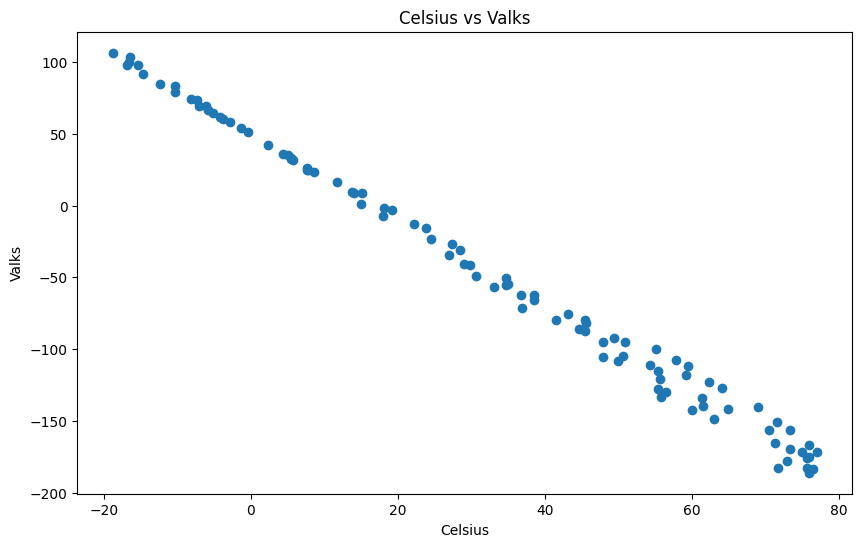

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Celsius'], data['Valks'])
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Celsius vs Valks')
plt.show()

# **Inicio de Modelo**

Tasa de aprendizaje óptima: 0.001
Theta final: [44.50050453 -2.89035741]
Costo final: 27.995210510213692


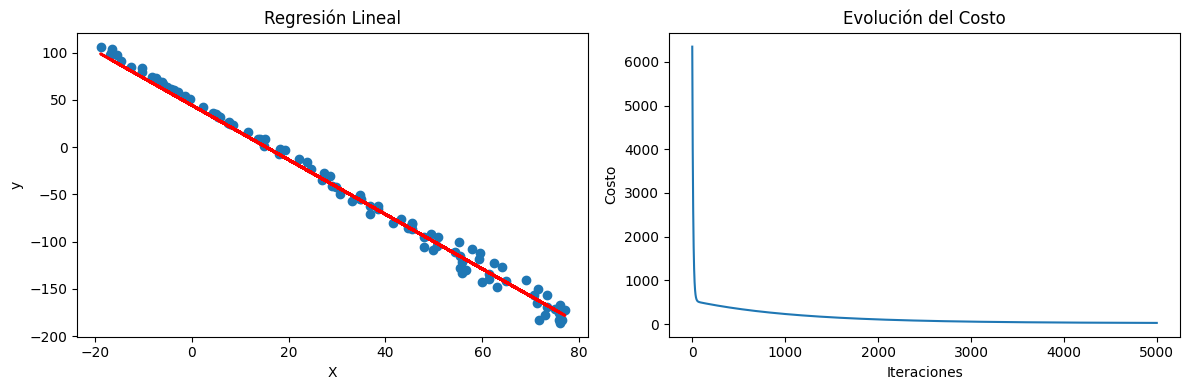

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)
#y = 4 + 3 * X + np.random.randn(100, 1)
X = data['Celsius'].values.reshape(-1, 1)
y = data['Valks'].values.reshape(-1, 1)

# Añadir una columna de unos para el término de sesgo
X_b = np.c_[np.ones((100, 1)), X]

# Inicializar parámetros
theta = np.random.randn(2, 1)
n_iterations = 5000
m = 100

# Función para calcular el costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Función para realizar el descenso del gradiente
def gradient_descent(X, y, theta, n_iterations, alpha):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations, 2))

    for it in range(n_iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = compute_cost(X, y, theta)

    return theta, cost_history, theta_history

# Búsqueda de la tasa de aprendizaje óptima
alphas = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
costs = []

for alpha in alphas:
    theta_temp, cost_history, _ = gradient_descent(X_b, y, theta, n_iterations, alpha)
    costs.append(cost_history[-1])

optimal_alpha = alphas[np.argmin(costs)]

# Ejecutar el descenso del gradiente con la tasa de aprendizaje óptima
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, n_iterations, optimal_alpha)

# Imprimir resultados
print(f"Tasa de aprendizaje óptima: {optimal_alpha}")
print(f"Theta final: {theta.ravel()}")
print(f"Costo final: {cost_history[-1]}")

# Graficar los resultados
plt.figure(figsize=(12, 4))

# Graficar los datos y la línea de regresión
plt.subplot(121)
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')

# Graficar la evolución del costo
plt.subplot(122)
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del Costo')

plt.tight_layout()
plt.show()